## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

max_promising_drgReg = 4

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
comb_data = pd.merge(mouse_metadata, study_results, how='outer',on="Mouse ID")
comb_data.to_csv("data/combined_data.csv")

# Group combined data as per Drug Regimen
drug_grp_data = comb_data.groupby(comb_data['Drug Regimen'])
drug_grp_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [15]:
# Extract Tumor Volume column after merging both .csv files for ease of statistical calculations
tumor_vol = drug_grp_data["Tumor Volume (mm3)"]

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tbl_df = pd.DataFrame({
    "Tumor Volume Mean" : tumor_vol.mean(),
    "Tumor Volume Median" : tumor_vol.median(),
    "Tumor Volume Variance" : tumor_vol.var(),
    "Tumor Volume Std. Dev." : tumor_vol.std(),
    "Tumor Volume Std. Err." : tumor_vol.sem(),
    "Tumor Volume Total" : tumor_vol.sum()
})
summary_tbl_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Tumor Volume Total
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,9355.420462
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,9361.228582
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,9413.493529
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,10384.299876
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,10105.671026
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,9780.078122
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,8423.930878
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,9169.417875
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,9816.199991


## Bar plots

<function matplotlib.pyplot.show(*args, **kw)>

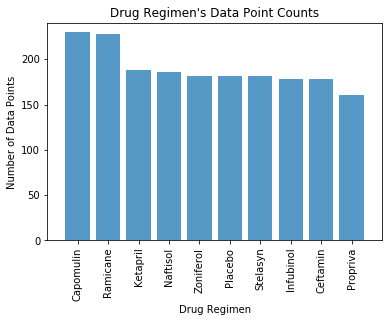

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# count data points of each drug regimens and convert to dictionary for ease of plotting
data_pt_counts = dict(comb_data["Drug Regimen"].value_counts())

# create x-axis tick locations and assign x/y-axis data
xtick_loc = [tick for tick in np.arange(len(data_pt_counts))]
x_axis = data_pt_counts.keys()
y_axis = data_pt_counts.values()

# create bar chart and axis labels
plt.bar(x_axis, y_axis, alpha=0.75, align = 'center')
plt.xticks(xtick_loc, x_axis, rotation='vertical')
plt.title("Drug Regimen's Data Point Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+10)
plt.show

Text(0, 0.5, 'Data Point Counts')

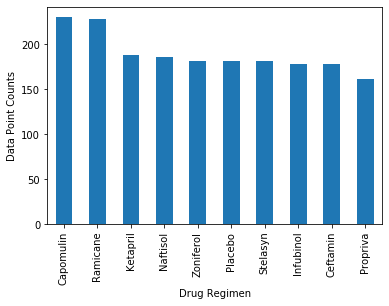

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_reg_count = comb_data["Drug Regimen"].value_counts()

# create bar chart and axis labels
drug_plot = drug_reg_count.plot(kind='bar')
drug_plot.set_xlabel("Drug Regimen")
drug_plot.set_ylabel("Data Point Counts")


## Pie plots

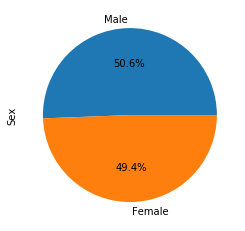

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_group = comb_data["Sex"].value_counts()
mice_gender_plot_pd = mice_gender_group.plot(kind="pie", autopct="%1.1f%%")


Text(0.5, 1.0, 'Sex')

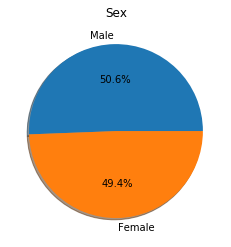

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_dict = dict(mice_gender_group)
plt.pie(mice_gender_group, autopct="%1.1f%%", shadow=True, labels=mice_gender_dict.keys())
plt.title("Sex")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
promis_drug_df = summary_tbl_df.nsmallest(max_promising_drgReg, "Tumor Volume Std. Err.")

lis_of_prom_drug = list(promis_drug_df.index.values)
combined_boxplot_data = []
x_axis = []
for eachname in lis_of_prom_drug:
    x_axis.append(eachname)
    filtered_grp_data = comb_data.loc[comb_data['Drug Regimen']==eachname, ['Drug Regimen', 'Tumor Volume (mm3)']]
    list_eachname_tumorVol = list(filtered_grp_data['Tumor Volume (mm3)'])
    combined_boxplot_data.append(list_eachname_tumorVol)
    
    #  Quartiles Calculations
    print(f'For the Drug Regimen: \033[1;34;43m {eachname} \033[00m, here are the results:')
    print('-------------------')
    total_tum_vol = int(filtered_grp_data['Tumor Volume (mm3)'].sum())
    quartiles = filtered_grp_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2)
    medq = round(quartiles[0.5], 2)
    iqr = round(upperq-lowerq, 2)
    print(f"The Total of Tumor Volume is: \033[1;31m{total_tum_vol:,}\033[00m")
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {medq} ")

    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    print(f"Values below \033[1;31m{lower_bound}\033[00m could be outliers.")
    print(f"Values above \033[1;31m{upper_bound}\033[00m could be outliers.")
    print('')
    print('===================================================================')
    print('')

For the Drug Regimen:  Ramicane , here are the results:
-------------------
The Total of Tumor Volume is: 9,169
The lower quartile of Tumor Volume is: 36.67
The upper quartile of Tumor Volume is: 45.0
The interquartile range of Tumor Volume is: 8.33
The the median of Tumor Volume is: 40.67 
Values below 24.18 could be outliers.
Values above 57.5 could be outliers.


For the Drug Regimen:  Capomulin , here are the results:
-------------------
The Total of Tumor Volume is: 9,355
The lower quartile of Tumor Volume is: 37.69
The upper quartile of Tumor Volume is: 45.0
The interquartile range of Tumor Volume is: 7.31
The the median of Tumor Volume is: 41.56 
Values below 26.72 could be outliers.
Values above 55.96 could be outliers.


For the Drug Regimen:  Ceftamin , here are the results:
-------------------
The Total of Tumor Volume is: 9,361
The lower quartile of Tumor Volume is: 47.21
The upper quartile of Tumor Volume is: 56.8
The interquartile range of Tumor Volume is: 9.59
The the me

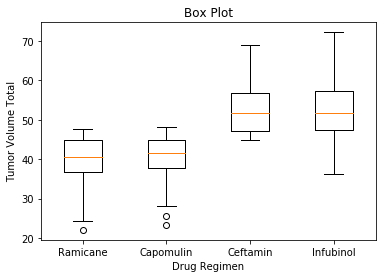

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined_boxplot_data
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume Total')
ax1.set_xticklabels(x_axis)
ax1.boxplot(combined_boxplot_data)
plt.show()

## Line and scatter plots

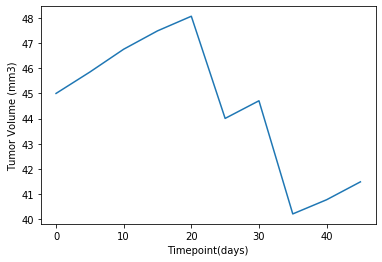

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data_time = comb_data.loc[(comb_data['Drug Regimen']=="Capomulin") & (comb_data['Mouse ID']=="l509"), :]
x_axis = capomulin_data_time['Timepoint']
y_axis = capomulin_data_time['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

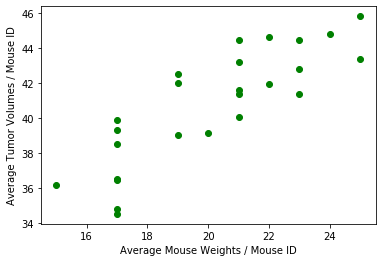

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data_wgt = comb_data.loc[(comb_data['Drug Regimen']=="Capomulin"), :]
capomulin_data_wgt = capomulin_data_wgt.groupby(["Mouse ID"])
capomulin_aver_weight = capomulin_data_wgt["Weight (g)"].mean()
capomulin_aver_tumor_vol= capomulin_data_wgt["Tumor Volume (mm3)"].mean()


plt.scatter(x=capomulin_aver_weight, y=capomulin_aver_tumor_vol,color='green')
plt.xlabel("Average Mouse Weights / Mouse ID")
plt.ylabel("Average Tumor Volumes / Mouse ID")
plt.show()
            

--------------------------------------------------
The Correlation Coefficient is:  0.84 
--------------------------------------------------
The Linear Regression Model:  y = 0.95x + 21.55 
--------------------------------------------------


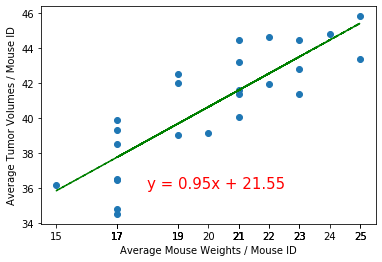

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
plt_slope, plt_incpt, plt_rval, plt_pval, plt_stderr = st.linregress(capomulin_aver_weight, capomulin_aver_tumor_vol)

# Curve fit model
plt_lin_fit = plt_slope * capomulin_aver_weight + plt_incpt

# create string for curve fit equation
line_eq = "y = " + str(round(plt_slope,2)) + "x + " + str(round(plt_incpt,2))

print(f'--------------------------------------------------\nThe Correlation Coefficient is: \033[1;34m {round(plt_rval, 2)} \033[00m\
\n--------------------------------------------------')

print(f'The Linear Regression Model: \033[1;31m {line_eq} \033[00m\
\n--------------------------------------------------')


# Plot the linear model on top of scatter plot 
plt.scatter(capomulin_aver_weight,capomulin_aver_tumor_vol)
plt.plot(capomulin_aver_weight,plt_lin_fit, color='green', linestyle='dashed')
plt.xticks(capomulin_aver_weight)
plt.xlabel("Average Mouse Weights / Mouse ID")
plt.ylabel("Average Tumor Volumes / Mouse ID")
line_eq = "y = " + str(round(plt_slope,2)) + "x + " + str(round(plt_incpt,2))
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.show()